Dla zbiorów (miasto, nasłonecznienie) A = f(Warszawa, 0.6), (Kraków, 1.0), (Gdańsk, 0.9), (Wrocław, 0.8), (Katowice, 0.3), (Poznań, 0.7), (Gliwice, 0.3)g oraz (miasto, skażenie powietrza) B = f(Warszawa, 0.3), (Kraków, 0.1), (Gdańsk, 0.9), (Wrocław, 0.7), (Katowice, 0.1), (Poznań, 0.6), (Gliwice, 0.1)g wyznaczyć decyzję reguły rozmytej dla jakości życia. Jeśli nasłonecznienie jest wysokie i skażenie powietrza niskie, to miasto jest przyjazne ludziom.

Przedziały dla poszczególnych cech oraz zmienne lingwistyczne

Nasłoniecznienie : 
- Low <0.0,0.3>
- Medium <0.3,0.7>
- High <0.7,1.0>

Skażenie :
- Low <0.0,0.3>
- Medium <0.3,0.7>
- High <0.7,1.0>

Przyjazność dla ludzi:
- Low <0.0,0.4>
- Medium <0.4,0.8>
- High <0.8,1.0>

Reguły rozmyte:
- **Jeśli nasłonecznienie jest wysokie i skażenie powietrza niskie, to miasto jest przyjazne ludziom.**

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# crisp set
naslonecznienie = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'naslonecznienie')
skazenie= ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'skazenie')
przyjaznosc = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'przyjaznosc')

# fuzzyfication
naslonecznienie['Low'] = fuzz.trimf(naslonecznienie.universe, [0, 0.0, 0.3])
naslonecznienie['Medium'] = fuzz.trimf(naslonecznienie.universe, [0.3, 0.5, 0.7])
naslonecznienie['High'] = fuzz.trimf(naslonecznienie.universe, [0.7, 1, 1])

skazenie['Low'] = fuzz.trimf(skazenie.universe, [0, 0, 0.3])
skazenie['Medium'] = fuzz.trimf(skazenie.universe, [0.3, 0.5, 0.7])
skazenie['High'] = fuzz.trimf(skazenie.universe, [0.7, 1, 1])

przyjaznosc['Low'] = fuzz.trimf(przyjaznosc.universe, [0, 0, 0.4])
przyjaznosc['Medium'] = fuzz.trimf(przyjaznosc.universe, [0.4, 0.6, 0.8])
przyjaznosc['High'] = fuzz.trimf(przyjaznosc.universe, [0.8, 1, 1])

# rule set
rule1 = ctrl.Rule(naslonecznienie['Low'] & skazenie['Low'], przyjaznosc['Low'])
rule2 = ctrl.Rule(naslonecznienie['Low'] & skazenie['Medium'], przyjaznosc['Low'])
rule3 = ctrl.Rule(naslonecznienie['Low'] & skazenie['High'], przyjaznosc['Low'])
rule4 = ctrl.Rule(naslonecznienie['Medium'] & skazenie['Low'], przyjaznosc['Low'])
rule5 = ctrl.Rule(naslonecznienie['Medium'] & skazenie['Medium'], przyjaznosc['Medium'])
rule6 = ctrl.Rule(naslonecznienie['Medium'] & skazenie['High'], przyjaznosc['Medium'])
rule7 = ctrl.Rule(naslonecznienie['High'] & skazenie['Low'], przyjaznosc['High'])
rule8 = ctrl.Rule(naslonecznienie['High'] & skazenie['Medium'], przyjaznosc['Medium'])
rule9 = ctrl.Rule(naslonecznienie['High'] & skazenie['High'], przyjaznosc['Low'])
controller = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9])
controller = ctrl.ControlSystemSimulation(controller)
naslonecznienie.view()
skazenie.view()
przyjaznosc.view()
controller.input['naslonecznienie'] = 0.9
controller.input['skazenie'] = 0.9

# defuzification
controller.compute()
przyjaznosc.view(sim=controller)

print(controller.output['przyjaznosc'])

F:\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


0.14444444444444446


Dla zbiorów (dzień, czas wolny) A = f(poniedziałek, 0.6), (wtorek, 0.6), (środa, 0.5), (czwartek, 0.5), (piątek, 0.7), (sobota, 0.8), (niedziela, 0.9)g oraz (rozrywka, koszty) B = f(kino, 0.6), (teatr, 0.7), (restauracja, 0.9), (sport na powietrzu, 0.2), (sport w klubie, 0.6), (basen, 0.3), (czytanie, 0.1), (film w domu, 0.1)g oraz (miesiąc, poziom aktywności) C = f(styczeń, 0.2), (luty, 0.1), (marzec, 0.5), (kwiecień, 0.5), (maj, 0.7), (czerwiec, 0.8), (lipiec, 0.9), (sierpień, 0.9), (wrzesień, 0.8), (październik, 0.5), (listopad, 0.3), (grudzień, 0.2)g wyznaczyć decyzję reguły rozmytej dla jakości życia. Jeśli rozrywka ma niskie koszty i (dzień tygodnia ma dużo wolnego czasu lub miesiąc ma wysoką aktywność), to wybieram różną aktywność.


czas_wolny : 
- Low <0.0,0.3>
- Medium <0.3,0.7>
- High <0.7,1.0>

koszty :
- Low <0.0,0.3>
- Medium <0.3,0.7>
- High <0.7,1.0>

poziom_aktywnosci:
- Low <0.0,0.4>
- Medium <0.4,0.8>
- High <0.8,1.0>

jakosc_zycia:
- Low <0.0,0.4>
- Medium <0.4,0.8>
- High <0.8,1.0>

Reguły rozmyte : 
-  **Jeśli rozrywka ma niskie koszty i (dzień tygodnia ma dużo wolnego czasu lub miesiąc ma wysoką aktywność), to wybieram różną aktywność.**

0.5


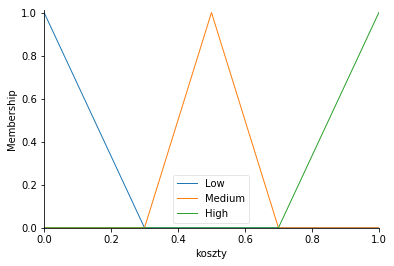

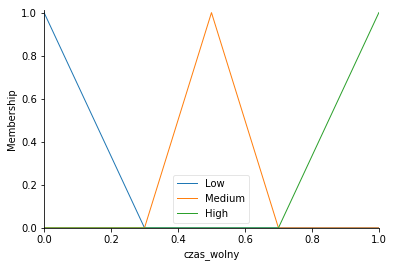

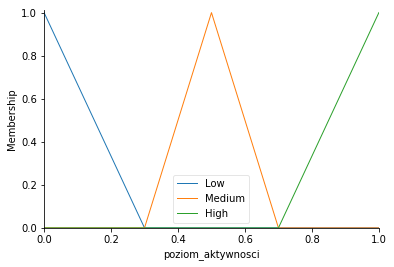

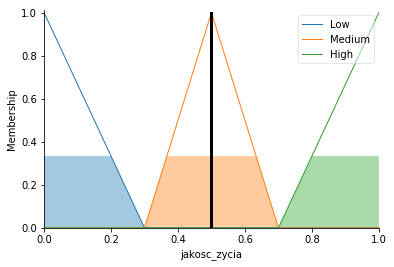

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# crisp set
czas_wolny = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'czas_wolny')
koszty= ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'koszty')
poziom_aktywnosci = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'poziom_aktywnosci')
jakosc_zycia = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'jakosc_zycia')
# fuzzyfication
czas_wolny['Low'] = fuzz.trimf(czas_wolny.universe, [0, 0.0, 0.3])
czas_wolny['Medium'] = fuzz.trimf(czas_wolny.universe, [0.3, 0.5, 0.7])
czas_wolny['High'] = fuzz.trimf(czas_wolny.universe, [0.7, 1, 1])

koszty['Low'] = fuzz.trimf(koszty.universe, [0, 0.0, 0.3])
koszty['Medium'] = fuzz.trimf(koszty.universe, [0.3, 0.5, 0.7])
koszty['High'] = fuzz.trimf(koszty.universe, [0.7, 1, 1])

poziom_aktywnosci['Low'] = fuzz.trimf(poziom_aktywnosci.universe, [0, 0.0, 0.3])
poziom_aktywnosci['Medium'] = fuzz.trimf(poziom_aktywnosci.universe, [0.3, 0.5, 0.7])
poziom_aktywnosci['High'] = fuzz.trimf(poziom_aktywnosci.universe, [0.7, 1, 1])

jakosc_zycia['Low'] = fuzz.trimf(jakosc_zycia.universe, [0, 0.0, 0.3])
jakosc_zycia['Medium'] = fuzz.trimf(jakosc_zycia.universe, [0.3, 0.5, 0.7])
jakosc_zycia['High'] = fuzz.trimf(jakosc_zycia.universe, [0.7, 1, 1])

# rule set
rule1 = ctrl.Rule(koszty['Low'] & (czas_wolny['Low'] |  poziom_aktywnosci['Low']), jakosc_zycia['Low'])
rule2 = ctrl.Rule(koszty['Low'] & (czas_wolny['Low'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Low'])
rule3 = ctrl.Rule(koszty['Low'] & (czas_wolny['Low'] |  poziom_aktywnosci['High']), jakosc_zycia['Low'])
rule4 = ctrl.Rule(koszty['Low'] & (czas_wolny['Medium'] |  poziom_aktywnosci['Low']), jakosc_zycia['Medium'])
rule5 = ctrl.Rule(koszty['Low'] & (czas_wolny['Medium'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Medium'])
rule6 = ctrl.Rule(koszty['Low'] & (czas_wolny['Medium'] |  poziom_aktywnosci['High']), jakosc_zycia['Medium'])
rule7 = ctrl.Rule(koszty['Low'] & (czas_wolny['High'] |  poziom_aktywnosci['Low']), jakosc_zycia['High'])
rule8 = ctrl.Rule(koszty['Low'] & (czas_wolny['High'] |  poziom_aktywnosci['Medium']), jakosc_zycia['High'])
rule9 = ctrl.Rule(koszty['Low'] & (czas_wolny['High'] |  poziom_aktywnosci['High']), jakosc_zycia['High'])
rule10 = ctrl.Rule(koszty['Medium'] & (czas_wolny['Low'] |  poziom_aktywnosci['Low']), jakosc_zycia['Medium'])
rule11 = ctrl.Rule(koszty['Medium'] & (czas_wolny['Low'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Medium'])
rule12 = ctrl.Rule(koszty['Medium'] & (czas_wolny['Low'] |  poziom_aktywnosci['High']), jakosc_zycia['Medium'])
rule13= ctrl.Rule(koszty['Medium'] & (czas_wolny['Medium'] |  poziom_aktywnosci['Low']), jakosc_zycia['Medium'])
rule14 = ctrl.Rule(koszty['Medium'] & (czas_wolny['Medium'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Medium'])
rule15 = ctrl.Rule(koszty['Medium'] & (czas_wolny['Medium'] |  poziom_aktywnosci['High']), jakosc_zycia['Medium'])
rule16 = ctrl.Rule(koszty['Medium'] & (czas_wolny['High'] |  poziom_aktywnosci['Low']), jakosc_zycia['Medium'])
rule17 = ctrl.Rule(koszty['Medium'] & (czas_wolny['High'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Medium'])
rule18 = ctrl.Rule(koszty['Medium'] & (czas_wolny['High'] |  poziom_aktywnosci['High']), jakosc_zycia['Medium'])
rule19 = ctrl.Rule(koszty['High'] & (czas_wolny['Low'] |  poziom_aktywnosci['Low']), jakosc_zycia['Low'])
rule20 = ctrl.Rule(koszty['High'] & (czas_wolny['Low'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Low'])
rule21 = ctrl.Rule(koszty['High'] & (czas_wolny['Low'] | poziom_aktywnosci['High']), jakosc_zycia['Low'])
rule22 = ctrl.Rule(koszty['High'] & (czas_wolny['Medium'] | poziom_aktywnosci['Low']), jakosc_zycia['Low'])
rule23 = ctrl.Rule(koszty['High'] & (czas_wolny['Medium'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Low'])
rule24 = ctrl.Rule(koszty['High'] & (czas_wolny['Medium'] |  poziom_aktywnosci['High']), jakosc_zycia['Low'])
rule25 = ctrl.Rule(koszty['High'] & (czas_wolny['High'] |  poziom_aktywnosci['Low']), jakosc_zycia['Low'])
rule26 = ctrl.Rule(koszty['High'] & (czas_wolny['High'] |  poziom_aktywnosci['Medium']), jakosc_zycia['Low'])
rule27 = ctrl.Rule(koszty['High'] & (czas_wolny['High'] |  poziom_aktywnosci['High']), jakosc_zycia['Low'])
controller = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])

controller = ctrl.ControlSystemSimulation(controller)
koszty.view()
czas_wolny.view()

poziom_aktywnosci.view()
controller.input['koszty'] = 0.1
controller.input['czas_wolny'] = 0.8
controller.input['poziom_aktywnosci'] = 0.8

# defuzification
controller.compute()
jakosc_zycia.view(sim=controller)

print(controller.output['jakosc_zycia'])